In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [2]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('LG.csv')


In [3]:
# Chuyển cột 'Date' sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Thiết lập cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

In [5]:
# Chọn cột Close làm biến phụ thuộc
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [6]:
# Chuẩn hóa dữ liệu với phương pháp Min-Max
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

In [7]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỉ lệ 7:3
train_size = int(0.7 * len(data_scaled))
test_size = len(data_scaled) - train_size

train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]


In [8]:
# Chuẩn bị dữ liệu huấn luyện
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [9]:
# Huấn luyện một mô hình Hồi quy Tuyến tính
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# Hiển thị các hệ số và R-squared của mô hình
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: 0.23405227763573075
Coefficients: [0.00027072]
R-squared: 0.2324398109765431


In [11]:
# Chuẩn bị dữ liệu kiểm tra
x_test = np.arange(train_size, len(data_scaled)).reshape(-1, 1)
y_test = test_data.reshape(-1)

In [12]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

In [13]:
# Tính toán các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

# In ra các chỉ số đánh giá
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)


MSE: 0.06799491958480335
RMSE: 0.2607583547746905
MAPE: 0.609600007287122


In [14]:
# Tạo dự đoán cho 30 ngày tiếp theo sau khi hoàn thành kiểm tra
last_index =  df_Close.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))


In [15]:
# In ra dự đoán giá đóng cửa cho 30 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 30 ngày tiếp theo:')
print(y_next_30_days.flatten())

Dự đoán giá đóng cửa cho 30 ngày tiếp theo:
[149761.87544857 149800.62924643 149839.3830443  149878.13684217
 149916.89064004 149955.6444379  149994.39823577 150033.15203364
 150071.9058315  150110.65962937 150149.41342724 150188.16722511
 150226.92102297 150265.67482084 150304.42861871 150343.18241657
 150381.93621444 150420.69001231 150459.44381018 150498.19760804
 150536.95140591 150575.70520378 150614.45900164 150653.21279951
 150691.96659738 150730.72039525 150769.47419311 150808.22799098
 150846.98178885 150885.73558672]


In [16]:
# Lấy ngày cuối cùng từ chỉ số hiện tại
last_date = df.index[-1]


In [17]:
# Thêm một ngày vào ngày cuối cùng
next_date = last_date + pd.DateOffset(days=1)

In [18]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 30 ngày tới
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

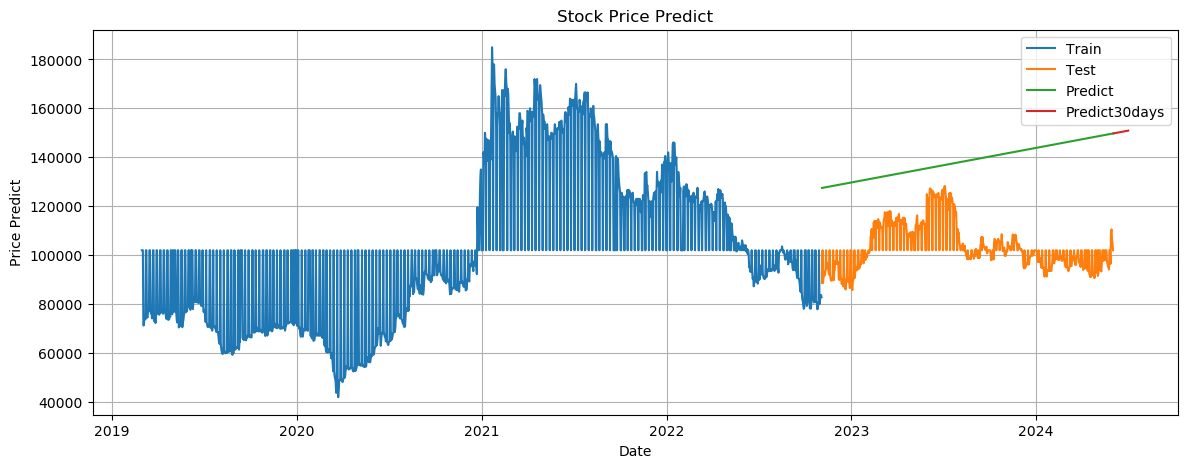

In [31]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 30 ngày tiếp theo
plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title("Stock Price Predict")
plt.xlabel("Date")
plt.ylabel("Price Predict")
plt.show()

In [20]:
# Tạo dự đoán cho 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

In [21]:
# In ra dự đoán giá đóng cửa cho 60 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 60 ngày tiếp theo:')
print(y_next_60_days.flatten())

Dự đoán giá đóng cửa cho 60 ngày tiếp theo:
[149761.87544857 149800.62924643 149839.3830443  149878.13684217
 149916.89064004 149955.6444379  149994.39823577 150033.15203364
 150071.9058315  150110.65962937 150149.41342724 150188.16722511
 150226.92102297 150265.67482084 150304.42861871 150343.18241657
 150381.93621444 150420.69001231 150459.44381018 150498.19760804
 150536.95140591 150575.70520378 150614.45900164 150653.21279951
 150691.96659738 150730.72039525 150769.47419311 150808.22799098
 150846.98178885 150885.73558672 150924.48938458 150963.24318245
 151001.99698032 151040.75077818 151079.50457605 151118.25837392
 151157.01217179 151195.76596965 151234.51976752 151273.27356539
 151312.02736325 151350.78116112 151389.53495899 151428.28875686
 151467.04255472 151505.79635259 151544.55015046 151583.30394832
 151622.05774619 151660.81154406 151699.56534193 151738.31913979
 151777.07293766 151815.82673553 151854.58053339 151893.33433126
 151932.08812913 151970.841927   152009.595724

In [22]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 60 ngày tới
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

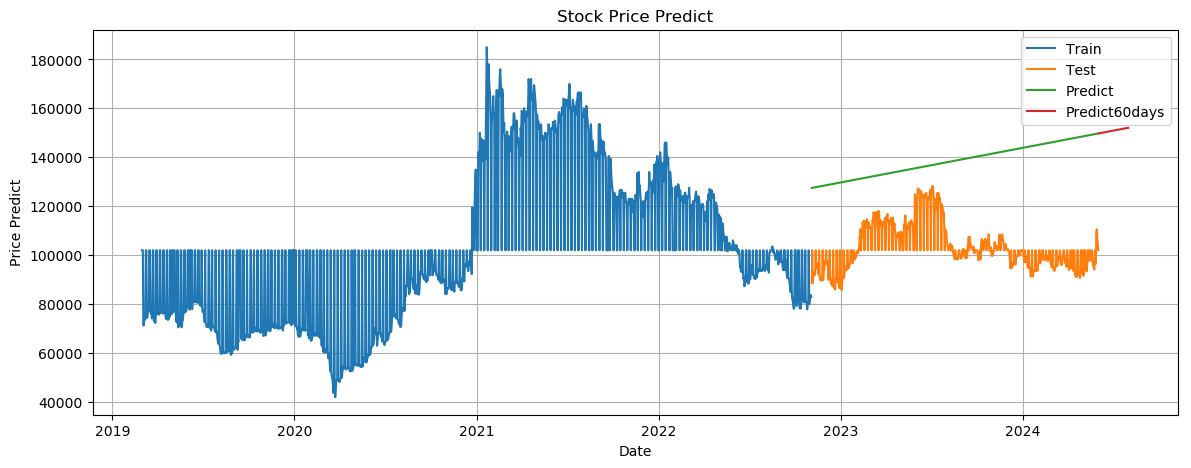

In [32]:
 # Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 60 ngày tiếp theo
plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])

plt.grid()
plt.title("Stock Price Predict")
plt.xlabel("Date")
plt.ylabel("Price Predict")
plt.show()

In [27]:
# Tạo dự đoán cho 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

In [28]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 90 ngày tới
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

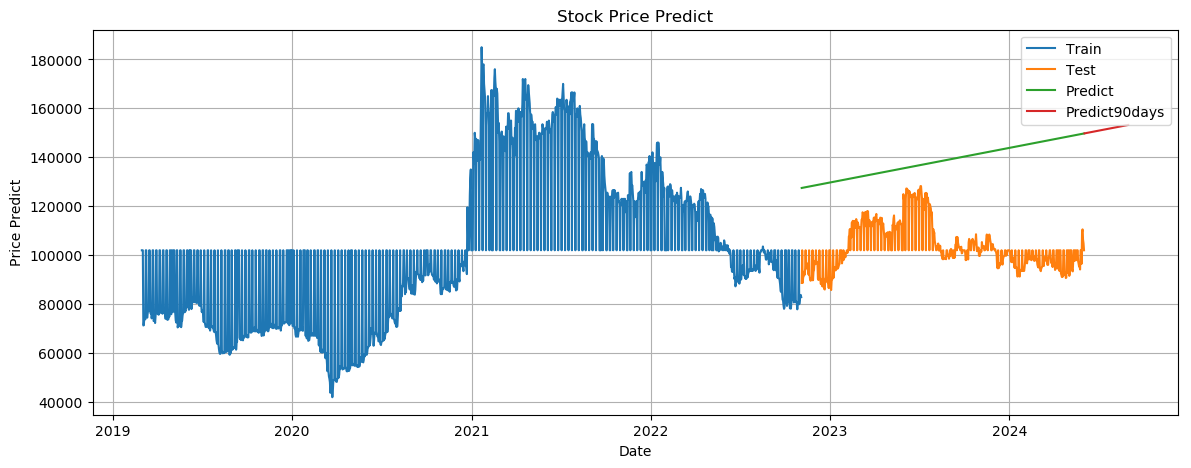

In [33]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 90 ngày tiếp theo
plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])

plt.grid()
plt.title("Stock Price Predict")
plt.xlabel("Date")
plt.ylabel("Price Predict")
plt.show()